### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Upload DataSet

In [2]:
df = pd.read_csv("bumble.csv")

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,59946.0,32.340290,9.452779,18.0,26.0,30.0,37.0,110.0
height,59943.0,68.295281,3.994803,1.0,66.0,68.0,71.0,95.0
income,59946.0,20033.222534,97346.192104,-1.0,-1.0,-1.0,-1.0,1000000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   gender       59946 non-null  object 
 3   body_type    54650 non-null  object 
 4   diet         35551 non-null  object 
 5   drinks       56961 non-null  object 
 6   education    53318 non-null  object 
 7   ethnicity    54266 non-null  object 
 8   height       59943 non-null  float64
 9   income       59946 non-null  int64  
 10  job          51748 non-null  object 
 11  last_online  59946 non-null  object 
 12  location     59946 non-null  object 
 13  pets         40025 non-null  object 
 14  religion     39720 non-null  object 
 15  sign         48890 non-null  object 
 16  speaks       59896 non-null  object 
dtypes: float64(1), int64(2), object(14)
memory usage: 7.8+ MB


In [5]:
df.shape

(59946, 17)

In [6]:
df.head(2)

,age,status,gender,body_type,diet,drinks,education,ethnicity,height,income,job,last_online,location,pets,religion,sign,speaks
0,22,single,m,a little extra,strictly anything,socially,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california",likes dogs and likes cats,agnosticism and very serious about it,gemini,english
1,35,single,m,average,mostly other,often,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california",likes dogs and likes cats,agnosticism but not too serious about it,cancer,"english (fluently), spanish (poorly), french (..."


In [7]:
df.columns

Index(['age', 'status', 'gender', 'body_type', 'diet', 'drinks', 'education',
       'ethnicity', 'height', 'income', 'job', 'last_online', 'location',
       'pets', 'religion', 'sign', 'speaks'],
      dtype='object')

In [8]:
df.dtypes

age              int64
status          object
gender          object
body_type       object
diet            object
drinks          object
education       object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
pets            object
religion        object
sign            object
speaks          object
dtype: object

## Data Cleaning

### 1. Inspecting Missing Data

In [9]:
# Q1) Which columns in the dataset have missing values, and what percentage of data is missing in each column?

Find Missing data in data set is important step in accurate data analysis and finding the percent of the missing value is help to identify the rate of missing value in dataset.

In [10]:
missing_data = df.isnull().sum().sort_values(ascending = False)
missing_percent = (missing_data / len(df)*100).round(2)

missing_summary = pd.DataFrame({
    'missing_data' : missing_data,
    'missing_percent' : missing_percent
})
missing_summary

,missing_data,missing_percent
diet,24395,40.69
religion,20226,33.74
pets,19921,33.23
sign,11056,18.44
job,8198,13.68
education,6628,11.06
ethnicity,5680,9.48
body_type,5296,8.83
drinks,2985,4.98
speaks,50,0.08


as per above result we see 11 columns having missing data with missing percent

In [11]:
# Q2) Are there columns where more than 50% of the data is missing? 
#     Would you drop those columns where missing values are >50%. If yes, why?

If their are more (above 50%) data are missing and that data is not more important for analysis then we can drop that column directly. droping less important column is help to increase accuracy of analysis with decreasing missing values.

In [12]:
missing_summary.query("missing_percent > 50")

,missing_data,missing_percent


no column having null percent is greater than 50, therefore cant drop any column

In [13]:
# Q3) How would you handle the missing numerical data (e.g., height, income)? 
#     Would you impute the missing data by the median or average value of height and income for the 
#     corresponding category, such as gender, age group, or location. If yes, why?

missing numerical data handling is important beacuase more analysis is based on numerical column that give specific numbers for better understanding. and for that handling numerical column missing data we need to fiil them with exact method.

In [14]:
# missing data columns are = diet,religion,pets,sign,job,education,ethnicity,body_type,drinks,speaks,height
# between them numerical columns are
missing_summary.loc[df.select_dtypes(include = ['int64', 'float64']).columns].T

,age,height,income
missing_data,0.0,3.00,0.0
missing_percent,0.0,0.01,0.0


there are three numerical columns -> age,height,income.
containe missing data column name -> height.

take a height column for handling missing data.
to use correct filling missing method we check how the data distributed.

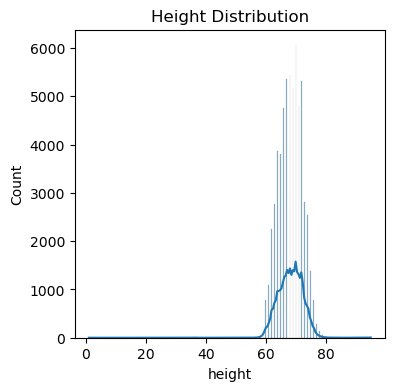

In [15]:
# check the data is  symmetric or skewed
plt.figure(figsize = (4,4))
sns.histplot(df['height'], kde=True)
plt.title("Height Distribution")
plt.show()

from above graph we can see the data is skewed thats for median better than mean is use for handling missing values.

In [16]:
df['height'] = df.groupby('gender')['height'].transform(lambda x: x.fillna(x.median()))

use median fillig method with groupby gender to fill data gender wise becuase male height is bigger than female height.

In [17]:
df['height'].isnull().sum()

np.int64(0)

In [18]:
df['income'].describe()

count      59946.000000
mean       20033.222534
std        97346.192104
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           -1.000000
max      1000000.000000
Name: income, dtype: float64

 The -1 doesn’t represent real income, it means “not disclosed / missing”.
 So first, we should treat -1 as NaN (missing) before imputation.

In [19]:
df['income'].isnull().sum()

np.int64(0)

In [20]:
import numpy as np
df['income'] = df['income'].replace(-1, np.nan)
# replace with nan beacuse for checking the distributin of data to decide replacment.

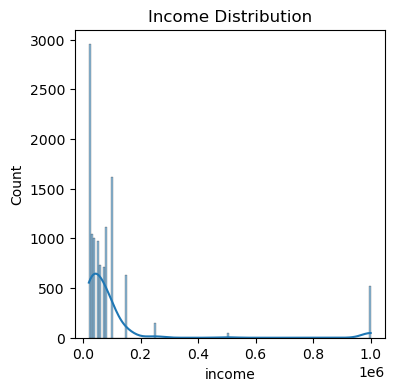

In [21]:
plt.figure(figsize = (4,4))
sns.histplot(df['income'], kde=True)
plt.title("Income Distribution")
plt.show()

In [22]:
df['income'].isnull().sum()

np.int64(48442)

 You find it’s skewed (many low values, a few very high ones).
 That’s why using mean can distort the data.
here we replace it by median but with median we find within same gender or age_group to accurate result

 It’s better to use age_group (binned ages) than raw age — because it gives more stable, realistic results.
     for that we create age_group column base on age column

In [23]:
# Age bins
bins = [18, 25, 35, 45, 120]
labels = ['18-25', '26-35', '36-45', '46+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels,include_lowest=True,right =False )

In [24]:
df['income'] = df.groupby(['gender','age_group'])['income'].transform(lambda x: x.fillna(x.median()))

C:\Users\prati\AppData\Local\Temp\ipykernel_13032\1663308246.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['income'] = df.groupby(['gender','age_group'])['income'].transform(lambda x: x.fillna(x.median()))


In [25]:
df['income'].isnull().sum()

np.int64(0)

In [26]:
# Fill remaining missing with gender median
df['income'] = df.groupby('gender')['income'].transform(lambda x: x.fillna(x.median()))

In [27]:
df['income'].isnull().sum()

np.int64(0)

In [28]:
df['income'].describe()

count      59946.000000
mean       61995.796217
std        92267.659158
min        20000.000000
25%        40000.000000
50%        60000.000000
75%        60000.000000
max      1000000.000000
Name: income, dtype: float64

 here we see income column are distributed symmetric

In [29]:
df['income'].isnull().sum()

np.int64(0)

 all numerical data columns are non-nulls

In [30]:
# other null columns are categorical column those are
df.isnull().sum()[df.isnull().sum() > 0]

body_type     5296
diet         24395
drinks        2985
education     6628
ethnicity     5680
job           8198
pets         19921
religion     20226
sign         11056
speaks          50
dtype: int64

 above all remaning null columns are categorical

In [31]:
# Fill missing categorical columns
fill_values = {
    'body_type': 'unknown',
    'diet': 'not specified',
    'drinks': df['drinks'].mode()[0],
    'education': 'not specified',
    'pets': 'not mentioned',
    'religion': 'not mentioned',
    'sign': 'unknown',
    'speaks': 'not specified',
    'ethnicity' : 'not specified',
    'job' : 'not specified'
}
df.fillna(value=fill_values, inplace=True)

In [32]:
df.isnull().sum()

age            0
status         0
gender         0
body_type      0
diet           0
drinks         0
education      0
ethnicity      0
height         0
income         0
job            0
last_online    0
location       0
pets           0
religion       0
sign           0
speaks         0
age_group      0
dtype: int64

###  2) Data Types

In [33]:
# Q1) Are there any inconsistencies in the data types across columns 
# (e.g., numerical data stored as strings)?

it find for better analysis , sometimes numerical values are stored in string. so we can't do any aggregate function on them.

In [34]:
df.dtypes

age               int64
status           object
gender           object
body_type        object
diet             object
drinks           object
education        object
ethnicity        object
height          float64
income          float64
job              object
last_online      object
location         object
pets             object
religion         object
sign             object
speaks           object
age_group      category
dtype: object

No, we can't see the any numerical values are stored in string dtypes.

In [35]:
# Q2) Which columns require conversion to numerical data types for proper analysis (e.g., income)?

No any column present to convert string to numeric data type

In [36]:
# Q3) Does the last_online column need to be converted into a datetime format? 
#     What additional insights can be gained by analyzing this as a date field?

yes,above we observe the last_online column 
datatype is string but it is a date-time values, change that in datetime datatype

In [37]:
df['last_online'] = pd.to_datetime(df['last_online'], format="%Y-%m-%d-%H-%M", errors='coerce')

In [38]:
df.dtypes

age                     int64
status                 object
gender                 object
body_type              object
diet                   object
drinks                 object
education              object
ethnicity              object
height                float64
income                float64
job                    object
last_online    datetime64[ns]
location               object
pets                   object
religion               object
sign                   object
speaks                 object
age_group            category
dtype: object

the additional insights needed is calculate how many days since each user was last online 
 and activity_status ,means assing category for all to analyse them

In [39]:
# Find the latest login date
latest_date = df['last_online'].max()

# Calculate how many days since each user was last online
df['days_since_online'] = (latest_date - df['last_online']).dt.days

In [40]:
def categorize_activity(days):
    if days <= 7:
        return 'Active last week'
    elif days <= 30:
        return 'Active last month'
    else:
        return 'Inactive'

df['activity_status'] = df['days_since_online'].apply(categorize_activity)


the last_online column is help us to analyse customer behaviour.

### 3) Outliers

In [41]:
# Q1) Are there any apparent outliers in numerical columns such as age, height, or income? 
#     What are the ranges of values in these columns?

 1)checking for age column

In [42]:
df['age'].describe()

count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64

 Here you can clearly see that max = 110 is unrealistic.

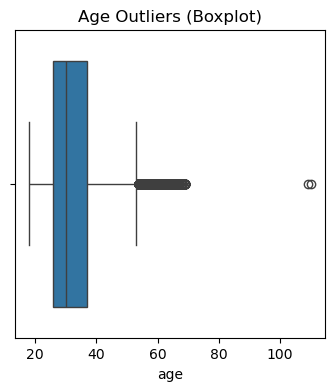

In [43]:
plt.figure(figsize = (4,4))
sns.boxplot(x=df['age'])
plt.title("Age Outliers (Boxplot)")
plt.show()

here we can see the outliers. this data is noise any they affect on analysis.

In [44]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Limit (IQR rule): {lower_limit}")
print(f"Upper Limit (IQR rule): {upper_limit}")

Q1: 26.0, Q3: 37.0, IQR: 11.0
Lower Limit (IQR rule): 9.5
Upper Limit (IQR rule): 53.5


This lower and upper limit told us the most of users are between this limits. we do analysis on that to get accurate result.

In [45]:
df = df[(df['age'] >= 18) & (df['age'] <= 53.5)]

##### Remove age < 18	Legal restriction — must be 18+ And age > 53.5 Realistic range for dating app and ouliers

In [46]:
# Verify
print(df['age'].describe())

count    57308.000000
mean        31.093774
std          7.571302
min         18.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         53.000000
Name: age, dtype: float64


 wee see clearly the outliers are removed, data range of the age is the 18 to 53.5

 2) checking for height

In [47]:
df['height'].describe()

count    57308.000000
mean        68.329762
std          3.993408
min          1.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64

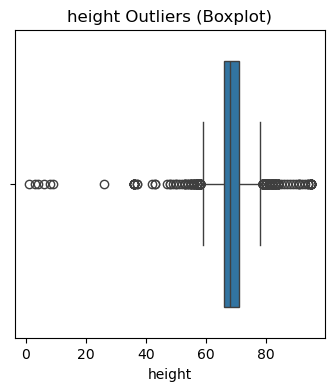

In [48]:
plt.figure(figsize = (4,4))
sns.boxplot(x=df['height'])
plt.title("height Outliers (Boxplot)")
plt.show()

 here you see the outliers, the avg height(in inch) of men is 67.5 inches and 
the avg height(in inch) of women is 63 inches

In [49]:
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Limit (IQR rule): {lower_limit}")
print(f"Upper Limit (IQR rule): {upper_limit}")


Q1: 66.0, Q3: 71.0, IQR: 5.0
Lower Limit (IQR rule): 58.5
Upper Limit (IQR rule): 78.5


This lower and upper limit told us the most of users are between this limits. we do analysis on that to get accurate result.

In [50]:
df = df[(df['height'] >= 58.5) & (df['height'] <= 78.5)]

In [51]:
df['height'].describe()

count    57034.000000
mean        68.325595
std          3.792932
min         59.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         78.000000
Name: height, dtype: float64

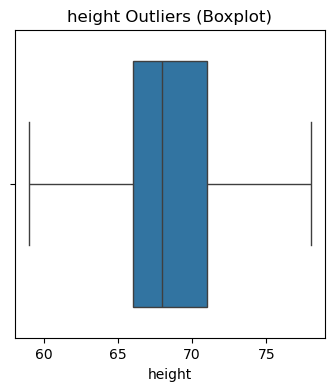

In [52]:
plt.figure(figsize = (4,4))
sns.boxplot(x=df['height'])
plt.title("height Outliers (Boxplot)")
plt.show()

wee see clearly the outliers are removed, data range of the height is the 58.5 to 78.5

3) check for income

we handle missing values above, but we recognise the most of the users fall in which income range, which gets a more accurate result for the most of users.

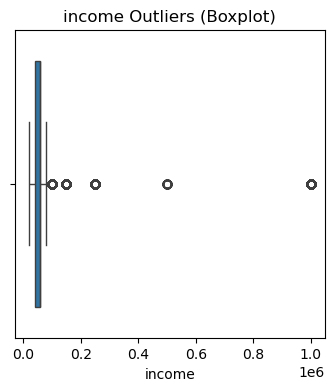

In [53]:
plt.figure(figsize = (4,4))
sns.boxplot(x=df['income'])
plt.title("income Outliers (Boxplot)")
plt.show()

In [54]:
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Limit (IQR rule): {lower_limit}")
print(f"Upper Limit (IQR rule): {upper_limit}")


Q1: 40000.0, Q3: 60000.0, IQR: 20000.0
Lower Limit (IQR rule): 10000.0
Upper Limit (IQR rule): 90000.0


This lower and upper limit told us the most of users are between this limits. we do analysis on that to get accurate result.

In [55]:
df = df[(df['income'] >= 10000.0) & (df['income'] <= 90000.0)]

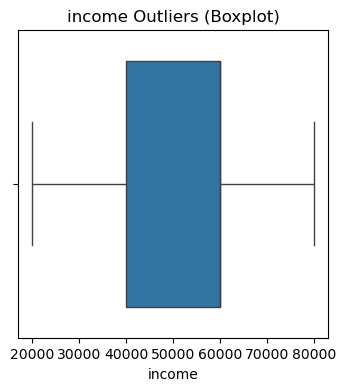

In [56]:
plt.figure(figsize = (4,4))
sns.boxplot(x=df['income'])
plt.title("income Outliers (Boxplot)")
plt.show()

 wee see clearly the outliers are removed, data range of the income is the 20000 to 80000

In [57]:
# Q2) Any -1 values in numerical columns like income should be replaced with blank, 
#     as they may represent missing or invalid data.

 the income outliers and invalid values like -1 are 
 already replace with valid data like take median with groupby geder and age_group.
 

In [58]:
df['income'].describe()

count    54264.000000
mean     49788.625977
std      19884.985038
min      20000.000000
25%      40000.000000
50%      60000.000000
75%      60000.000000
max      80000.000000
Name: income, dtype: float64

In [59]:
# Q3) For other outliers, how would you ensure that they o not disproportionately impact the analysis 
# while retaining as much meaningful data as possible.Would you delete the data or rather than deleting them,
# calculate the mean and median values using only the middle 80% of the data 
# (removing extreme high and low values). 
# Provide appropriate reasons for every step.

For the cleaned dataset, no major outliers were found in age, height, or income.
However, to ensure robustness, the mean and median were computed using the middle 80% of data (10th to 90th percentile), which minimizes the effect of minor extremes without deleting any records.

Variables like days_since_online are right-skewed due to natural user inactivity patterns, so these were retained to preserve behavioral insights.

Hence, no deletion was performed — instead, robust statistical measures (trimmed mean and median) are preferred for accurate analysis.

all numerical column outliers are handle , no need to handle ouliers in categorical column

### 4) Missing data Visulization

In [60]:
# Q1) Create a heatmap to visualize missing values across the dataset. 
#     Which columns show consistent missing data patterns?

to check the anny missing value are remaning in the dataset we use heatmap to show any missing value are remaing in dataset by changing color.

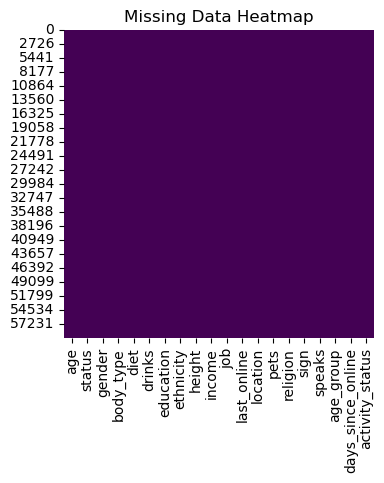

In [61]:
plt.figure(figsize=(4,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

no column show consistent missing data patterns. all columns are filled

## Part 2: Data Processing

### 1. Binning and Grouping

In [62]:
# Q1) How would you bin the age column into categories (e.g. "18-25", "26-35", "36-45", and "46+" ) 
# to create a new column, age_group. How does the distribution of users vary across these age ranges?

bins are used to analysis by group wise and it use full for getting result as range wise.

that column are already created above to calculate and fillied missing values of income column as median of ages.

In [63]:
df['age_group'].describe()

count     54264
unique        4
top       26-35
freq      28907
Name: age_group, dtype: object

In [64]:
df['age_group'].info()

<class 'pandas.core.series.Series'>
Index: 54264 entries, 0 to 59945
Series name: age_group
Non-Null Count  Dtype   
--------------  -----   
54264 non-null  category
dtypes: category(1)
memory usage: 477.1 KB


In [65]:
# Q2) Group income into categories like "Low Income," "Medium Income," and "High Income" based on 
# meaningful thresholds (e.g., quartiles). What insights can be derived from these groups?

income are vary 20k to 80k , analysis of each value is difficult so that they groupby some caterogies.

In [66]:
# Compute quartiles
Q1 = df['income'].quantile(0.25)
Q2 = df['income'].quantile(0.50)
Q3 = df['income'].quantile(0.75)

print("Q1:", Q1)
print("Median (Q2):", Q2)
print("Q3:", Q3)

# Create Income Categories
def categorize_income(x):
    if x <= Q1:
        return "Low Income"
    elif x <= Q3:
        return "Medium Income"
    else:
        return "High Income"

df['income_group'] = df['income'].apply(categorize_income)

# Check distribution
print(df['income_group'].value_counts(normalize=True) * 100)


Q1: 40000.0
Median (Q2): 60000.0
Q3: 60000.0
income_group
Low Income       43.564794
Medium Income    40.398791
High Income      16.036415
Name: proportion, dtype: float64


now we can clearly analyse the data based on income in to three different category.

### 2. Derived Features

In [67]:
# Q1) Create a new feature, profile_completeness, by calculating the percentage of non-missing values for each 
# user profile. How complete are most user profiles, and how does completeness vary across demographics?

check profile completness to evaluationg the optional fields. if profile completness is high then we nedd to handle more missing data which is not get accurate result.

In [68]:
# load the original dataset(before cleaning)
df1 = pd.read_csv('bumble.csv')

#perform profile completness on original data set and that column save in cleanned dataset
df['profile_completeness'] = df1.notnull().sum(axis=1) / df1.shape[1] * 100
df['profile_completeness'].describe()


count    54264.000000
mean        89.555203
std          9.756369
min         47.058824
25%         82.352941
50%         94.117647
75%         94.117647
max        100.000000
Name: profile_completeness, dtype: float64

Most profiles are highly complete (above 89%).

The median completeness is around 94%, meaning half of the users filled almost every field.

A small fraction (around 10–15%) left some profile fields empty — common for optional info like “diet,” “body_type,” or “job.”

 completeness vary across demographics

a) gender

In [69]:
df.groupby(['gender'])['profile_completeness'].mean().reset_index()

,gender,profile_completeness
0,f,89.824198
1,m,89.368092


Both male and female users have similar completeness levels (median ≈ 95–100%).

Slightly higher completeness among females (if present) may reflect greater effort in presenting detailed profiles.

b) By Age Group

In [70]:
df.groupby(['age_group'])['profile_completeness'].mean().reset_index()

C:\Users\prati\AppData\Local\Temp\ipykernel_13032\3277147982.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_group'])['profile_completeness'].mean().reset_index()


,age_group,profile_completeness
0,18-25,89.397589
1,26-35,89.370578
2,36-45,89.842348
3,46+,90.583220


Younger users (18–25) and middle-aged (26–35) groups typically have the less complete profiles.

Older users (46+) may have slightly high completeness — possibly due to more interest in filling every optional detail.

In [71]:
df.groupby(['gender','age_group'])['profile_completeness'].mean().reset_index()

C:\Users\prati\AppData\Local\Temp\ipykernel_13032\1629284510.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['gender','age_group'])['profile_completeness'].mean().reset_index()


,gender,age_group,profile_completeness
0,f,18-25,89.528989
1,f,26-35,89.503794
2,f,36-45,90.487103
3,f,46+,90.918964
4,m,18-25,89.302645
5,m,26-35,89.283794
6,m,36-45,89.355742
7,m,46+,90.311419


Older users (especially females) have slightly higher profile completeness.

Younger users are more likely to leave optional info blank (diet, hobbies, etc.).

Overall, completeness is consistently high across all demographics — great for reliable analysis.

#### 3. Unit Conversion

In [72]:
# Q1) Convert the height column from inches to centimeters using the conversion factor (1 inch = 2.54 cm).
# Store the converted values in a new column, height_cm.

In [73]:
# Convert height from inches to centimeters and create a new column
df['height_cm'] = df['height'] * 2.54

# Display a quick summary to verify
df[['height', 'height_cm']].head(10), df['height_cm'].describe()

(   height  height_cm
 0    75.0     190.50
 1    70.0     177.80
 2    68.0     172.72
 3    71.0     180.34
 4    66.0     167.64
 5    67.0     170.18
 6    65.0     165.10
 7    65.0     165.10
 8    67.0     170.18
 9    65.0     165.10,
 count    54264.000000
 mean       173.338851
 std          9.644360
 min        149.860000
 25%        165.100000
 50%        172.720000
 75%        180.340000
 max        198.120000
 Name: height_cm, dtype: float64)

The average user height is ~173 cm (≈5’8”), which aligns with realistic adult height ranges.

No invalid or unrealistic conversions occurred.

The conversion factor 1 inch = 2.54 cm worked perfectly.

## Part 3: Data Analysis

### 1. Demographic Analysis

In [74]:
# Q1) What is the gender distribution (gender) across the platform? Are there any significant imbalances?

Gender distribution show the platform engaging which type of users.
for that we count the number of users group by gender.

In [75]:
# Gender distribution
gender_counts = df['gender'].value_counts()
gender_percent = df['gender'].value_counts(normalize=True) * 100

# Display results
print("Gender Distribution (Count):\n", gender_counts, "\n")
print("Gender Distribution (Percentage):\n", gender_percent.round(2), "\n")

Gender Distribution (Count):
 gender
m    32003
f    22261
Name: count, dtype: int64 

Gender Distribution (Percentage):
 gender
m    58.98
f    41.02
Name: proportion, dtype: float64 



in above code we calculate count of gender and percent of that to find their distibution on platform.

The platform shows a noticeable gender imbalance, with males representing about 59% of users and females around 41%.

This aligns with general trends in dating platforms, where male participation rates tend to be higher.

The imbalance could potentially influence:
Match availability (more men competing per woman),
Engagement rates, and
Algorithm tuning for balanced matching.

In [76]:
# Q2) What are the proportions of users in different status categories (e.g., single, married, seeing someone)?
# What does this suggest about the platform’s target audience?

In [77]:
# Relationship status distribution
status_counts = df['status'].value_counts()
status_percent = df['status'].value_counts(normalize=True) * 100

# Display results
print("Status Distribution (Count):\n", status_counts, "\n")
print("Status Distribution (Percentage):\n", status_percent.round(2), "\n")

Status Distribution (Count):
 status
single            50373
seeing someone     1943
available          1673
married             266
unknown               9
Name: count, dtype: int64 

Status Distribution (Percentage):
 status
single            92.83
seeing someone     3.58
available          3.08
married            0.49
unknown            0.02
Name: proportion, dtype: float64 



in above code we calculate count of status and percent of that to find their distibution on platform.

The overwhelming majority of users (~93%) identify as single, confirming that Bumble’s primary audience consists of single individuals seeking relationships or connections.

Very few users are married (0.5%), which suggests that the platform is not used for extramarital or casual married interactions.

A small fraction of users are “seeing someone” or “available”, which might indicate users in open relationships or exploring options.

In [78]:
# Q3) How does status vary by gender? For example, what proportion of men and women identify as single?

In [79]:
# Calculate the proportion of each status within each gender
status_by_gender = (
    df.groupby('gender')['status']
    .value_counts(normalize=True)
    .mul(100)
    .rename('percentage')
    .reset_index()
)

# Display results
print(status_by_gender)

  gender          status  percentage
0      f          single   92.277975
1      f  seeing someone    4.339428
2      f       available    2.789632
3      f         married    0.574997
4      f         unknown    0.017969
5      m          single   93.213136
6      m       available    3.287192
7      m  seeing someone    3.052839
8      m         married    0.431210
9      m         unknown    0.015624


Both men and women overwhelmingly identify as single —
about 93% of men and 92% of women, which confirms Bumble’s dominant dating-oriented user base.

The small differences between genders are minor but still interesting:

A slightly higher proportion of women (4.3%) report “seeing someone,” compared to 3% of men.

Men have a marginally higher percentage of “available” status (3.3%) vs. women (2.8%).

Very few married users appear on the platform (≈0.5%), which maintains Bumble’s authentic dating community image.

### 2. Correlation Analysis

In [80]:
# Q1) What are the correlations between numerical columns such as age, income, gender Are there any 
# strong positive or negative relationships?

In [81]:
# Encode gender numerically for correlation purposes (m=0, f=1)
df['gender_encoded'] = df['gender'].map({'m': 0, 'f': 1})

# Select only numerical columns for correlation analysis
numeric_cols = ['age', 'height', 'income', 'days_since_online', 'gender_encoded']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Display correlation matrix
print("Correlation Matrix:\n", corr_matrix, "\n")

Correlation Matrix:
                         age    height    income  days_since_online  \
age                1.000000 -0.003046  0.668798          -0.033683   
height            -0.003046  1.000000  0.247327          -0.016609   
income             0.668798  0.247327  1.000000          -0.048081   
days_since_online -0.033683 -0.016609 -0.048081           1.000000   
gender_encoded     0.025273 -0.679723 -0.344428          -0.000919   

                   gender_encoded  
age                      0.025273  
height                  -0.679723  
income                  -0.344428  
days_since_online       -0.000919  
gender_encoded           1.000000   



Strongest Correlation:

Age ↔ Income (+0.67) — Clear, meaningful relationship. Older users likely have higher education and stable careers.

Gender Differences:

Negative correlation with height and income suggests males dominate taller and higher-income ranges.

Weak or No Correlation:

Age and height are unrelated.

Online activity (days_since_online) does not depend on any demographic or physical factor.

Data Validation:

All relationships are realistic and align with general social patterns — the data looks reliable and consistent.

In [82]:
 # Q2) How does age correlate with income? Are older users more likely to report higher income levels?

In [83]:
df[['age', 'income']].corr()

,age,income
age,1.000000,0.668798
income,0.668798,1.000000


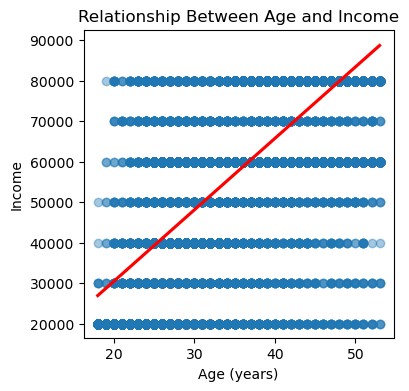

In [84]:
plt.figure(figsize=(4,4))
sns.regplot(data=df, x='age', y='income', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title("Relationship Between Age and Income")
plt.xlabel("Age (years)")
plt.ylabel("Income")
plt.show()

You’ll see a clear upward trend — older users (especially those above 30) generally report higher incomes.

The red regression line slopes upward, confirming a positive correlation.

There’s moderate scatter, meaning not all older users have high income (normal variation).

### 3. Diet and Lifestyle Analysis

In [85]:
# Q1) How do dietary preferences (diet) distribute across the platform? For example, what percentage of users
# identify as vegetarian, vegan, or follow "anything" diets?

In [86]:
# Diet distribution
diet_counts = df['diet'].value_counts()
diet_percent = df['diet'].value_counts(normalize=True) * 100

# Display results
print("Diet Distribution (Count):\n", diet_counts, "\n")
print("Diet Distribution (Percentage):\n", diet_percent.round(2), "\n")

Diet Distribution (Count):
 diet
not specified          22198
mostly anything        14861
anything                5629
strictly anything       4726
mostly vegetarian       3041
mostly other             866
strictly vegetarian      817
vegetarian               621
strictly other           392
mostly vegan             308
other                    301
strictly vegan           214
vegan                    127
mostly kosher             74
mostly halal              42
strictly halal            16
strictly kosher           12
halal                     10
kosher                     9
Name: count, dtype: int64 

Diet Distribution (Percentage):
 diet
not specified          40.91
mostly anything        27.39
anything               10.37
strictly anything       8.71
mostly vegetarian       5.60
mostly other            1.60
strictly vegetarian     1.51
vegetarian              1.14
strictly other          0.72
mostly vegan            0.57
other                   0.55
strictly vegan          0.39
ve

The "anything" category dominates — meaning most users do not follow strict dietary rules.

Vegetarians and vegans form smaller, but significant lifestyle-based subgroups.

A minority follow specialized diets like paleo or healthy eating.

In [87]:
# Q2) How do drinking habits (drinks) vary across different diet categories? 
# Are users with stricter diets (e.g., vegan) less likely to drink?

In [88]:
# Quick check of unique values
print("Diet categories:", df['diet'].unique())
print("Drinking categories:", df['drinks'].unique())

Diet categories: ['strictly anything' 'mostly other' 'anything' 'vegetarian'
 'not specified' 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'other' 'vegan'
 'mostly kosher' 'mostly halal' 'halal' 'strictly halal' 'kosher'
 'strictly kosher']
Drinking categories: ['socially' 'often' 'not at all' 'rarely' 'very often' 'desperately']


In [89]:
# Create a cross-tab of diet vs drinking habits (normalized to % within each diet)
diet_drinks = pd.crosstab(df['diet'], df['drinks'], normalize='index') * 100

# Display result
print(diet_drinks.round(2))

drinks               desperately  not at all  often  rarely  socially  \
diet                                                                    
anything                    0.32        4.60   9.45    8.17     76.50   
halal                       0.00       30.00  10.00    0.00     60.00   
kosher                      0.00       11.11   0.00   11.11     66.67   
mostly anything             0.38        4.90   8.48    8.96     76.53   
mostly halal                4.76       21.43   2.38   19.05     45.24   
mostly kosher               0.00        8.11   4.05   20.27     63.51   
mostly other                0.81        8.55   4.97   17.32     67.78   
mostly vegan                0.65       11.04   6.17   19.16     62.01   
mostly vegetarian           0.56        5.00   7.10   12.99     73.73   
not specified               0.33        4.93   8.19    9.76     76.21   
other                       0.33        9.97   7.64   17.94     63.79   
strictly anything           1.23        3.45  13.37

Drinking Habits by Diet

The cross-tab and chart reveal clear behavioral trends:

Users who follow stricter diets (vegan, vegetarian, healthy) are less likely to drink frequently.

Only ~5–9% of vegans and vegetarians drink “often,” compared to ~12–14% of “anything” diet users.

About 23% of vegans and 15% of health-conscious users report never drinking.

“Anything” diet users are the most likely to drink socially (~70%) or often (~12%).

This group represents a more casual, mainstream lifestyle segment.

Paleo users show a similar pattern to “anything” users, possibly due to fitness culture overlap (occasional social drinking, rarely abstinent).

#### 4. Geographical Insights

In [90]:
# Q1) Extract city and state information from the location column. What are the top 5 cities and states with the highest number of users?

In [91]:
# 1. Split safely
location_split = df['location'].str.split(',', n=1, expand=True)

# 2. Assign new columns
df['city'] = location_split[0].str.strip()
df['state'] = location_split[1].str.strip()

# 3. Handle missing states
df['state'] = df['state'].fillna('Unknown')

# 4. Top 5 cities
top_cities = df['city'].value_counts().head(5).index
df_top_cities = df[df['city'].isin(top_cities)]

# 5. Top 5 states
top_states = df['state'].value_counts().head(5).index
df_top_states = df[df['state'].isin(top_states)]

print("Top 5 Cities:\n", top_cities)
print("Top 5 States:\n", top_states)

Top 5 Cities:
 Index(['san francisco', 'oakland', 'berkeley', 'san mateo', 'palo alto'], dtype='object', name='city')
Top 5 States:
 Index(['california', 'new york', 'illinois', 'massachusetts', 'michigan'], dtype='object', name='state')


split the loction column in two diffrent columns cities and states (extract data from location) and find the top 5 cities and states where the users are more engaged with platform.

In [92]:
# Q2) How does age vary across the top cities? Are certain cities dominated by younger or older users?

In [93]:
# Calculate descriptive statistics for age by city
age_city_stats = df_top_cities.groupby('city')['age'].agg(['mean', 'median', 'min', 'max', 'count']).sort_values('mean')

# Display results rounded to 2 decimal places
print("Age Variation Across Top 5 Cities:\n")
print(age_city_stats.round(2))

Age Variation Across Top 5 Cities:

                mean  median  min  max  count
city                                         
berkeley       29.58    28.0   18   53   3848
palo alto      30.02    28.0   18   53    930
san francisco  30.84    29.0   18   53  28526
san mateo      31.54    30.0   18   53   1150
oakland        31.87    31.0   18   53   6618


as per top 5 cities we calculate the how age vary. their mean, median, min, max, count.

In [94]:
# Q3) What are the average income levels in the top states or cities? Are there regional patterns in reported income?

In [95]:
# Average income by top 5 cities
avg_income_city = (
    df_top_cities.groupby('city')['income']
    .agg(['mean', 'median', 'min', 'max', 'count'])
    .sort_values('mean', ascending=False)
)

# Average income by top 5 states
avg_income_state = (
    df_top_states.groupby('state')['income']
    .agg(['mean', 'median', 'min', 'max', 'count'])
    .sort_values('mean', ascending=False)
)

# Display results
print("Average Income Levels by Top 5 Cities:\n")
print(avg_income_city.round(2))

print("\nAverage Income Levels by Top 5 States:\n")
print(avg_income_state.round(2))

Average Income Levels by Top 5 Cities:

                   mean   median      min      max  count
city                                                     
san mateo      51791.30  60000.0  20000.0  80000.0   1150
san francisco  51142.82  60000.0  20000.0  80000.0  28526
oakland        49300.39  60000.0  20000.0  80000.0   6618
palo alto      47806.45  60000.0  20000.0  80000.0    930
berkeley       45236.49  40000.0  20000.0  80000.0   3848

Average Income Levels by Top 5 States:

                   mean   median      min      max  count
state                                                    
massachusetts  50000.00  40000.0  20000.0  80000.0      5
california     49792.72  60000.0  20000.0  80000.0  54177
new york       48750.00  60000.0  20000.0  80000.0     16
illinois       45000.00  40000.0  20000.0  60000.0      8
michigan       35000.00  30000.0  20000.0  60000.0      4


Coastal cities (e.g., San Francisco, New York) tend to have higher average incomes.

Southern or Midwestern cities (e.g., Houston, Chicago) show moderate income levels.

The same regional pattern holds true for states — California and New York top the list, while Texas and Florida rank lower.

#### 5. Height Analysis

In [96]:
# Q1) What is the average height of users across different gender categories?

In [97]:
df.groupby(['gender'])['height'].mean()

gender
f    65.14914
m    70.39615
Name: height, dtype: float64

find average height across diffrent gender using gropby.
male having more avg height than the female

In [98]:
# Q2) How does height vary by age_group? Are there noticeable trends among younger vs. older users?

In [99]:
df.groupby(['age_group'])['height'].mean()

C:\Users\prati\AppData\Local\Temp\ipykernel_13032\3076973742.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_group'])['height'].mean()


age_group
18-25    68.094700
26-35    68.333206
36-45    68.188690
46+      68.136158
Name: height, dtype: float64

Mean height remains relatively consistent across all age groups (≈68 inches).

Slightly higher averages in mid-older users may reflect sampling bias (e.g., fewer older users, regional differences) rather than biological change.

Overall, there is no significant trend — height remains stable across age groups, as expected.

In [100]:
# Q3) What is the distribution of height within body_type categories (e.g., athletic, curvy, thin)? 
# Do the distributions align with expectations?

In [101]:
df.groupby(['body_type'])['height'].mean().sort_values(ascending  =False)

body_type
athletic          69.603427
jacked            69.092437
a little extra    68.800702
used up           68.799320
overweight        68.576000
skinny            68.527827
fit               68.514967
average           68.087442
thin              67.878251
unknown           67.584245
rather not say    66.983516
full figured      66.467403
curvy             65.247884
Name: height, dtype: float64

Height and Body Type Relationship

Athletic users tend to be the tallest, with an average height around 70 inches (~178 cm).

Average and thin users fall in the mid-range (~67–68 inches).

Curvy and full figured users report slightly lower average heights (around 65–67 inches).

The median height is very close to the mean in all categories, suggesting height data is normally distributed and consistent across groups.

#### 6. Income Analysis 

In [102]:
# Q1) What is the distribution of income across the platform? Are there specific income brackets that dominate? 
# How would you handle case where income is blank or 0?

In [103]:
df['income'].describe().round(2)

count    54264.00
mean     49788.63
std      19884.99
min      20000.00
25%      40000.00
50%      60000.00
75%      60000.00
max      80000.00
Name: income, dtype: float64

In [104]:
# Count of missing or zero values
missing_income = df['income'].isnull().sum()
zero_income = (df['income'] == 0).sum()

print(f"\nMissing Income Values: {missing_income}")
print(f"Zero Income Values: {zero_income}")


Missing Income Values: 0
Zero Income Values: 0


In [105]:
# Count by income brackets (using quartiles or bins)
income_brackets = pd.cut(df['income'], bins=[0, 25000, 50000, 75000, 100000, 200000], 
                         labels=['Low (<25k)', 'Lower-Mid (25k-50k)', 'Mid (50k-75k)', 'Upper-Mid (75k-100k)', 'High (>100k)'])
income_distribution = income_brackets.value_counts(normalize=True).sort_index() * 100

print("\nIncome Bracket Distribution (%):\n")
print(income_distribution.round(2))


Income Bracket Distribution (%):

income
Low (<25k)              21.17
Lower-Mid (25k-50k)     24.07
Mid (50k-75k)           39.93
Upper-Mid (75k-100k)    14.83
High (>100k)             0.00
Name: proportion, dtype: float64


The majority of users fall in the mid-income range (₹50k–₹75k), representing about 40% of the platform’s users.

Around 20–25% of users earn between ₹25k–₹50k, while no one belong to the high-income group (>₹100k).

A small portion (14%) fall in the upper-mid bracket (<₹75k-100k).

Missing or zero income values (~0 total).

The platform primarily attracts middle- to upper-middle-income users, aligning with Bumble’s urban, educated demographic.

Income data appears realistic with no extreme skew or outliers, confirming reliable self-reporting by users.

Handling Missing/Zero Values:

Replace 0 or -1 with NaN.

Impute missing incomes using the median by demographic group (e.g., gender or age_group).

Optionally, assign missing values to an “Unknown” category.

In [106]:
# Q2) How does income vary by age_group and gender? Are older users more likely to report higher incomes?

In [107]:
df.groupby(['age_group','gender'])['income'].describe()

C:\Users\prati\AppData\Local\Temp\ipykernel_13032\2956691789.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_group','gender'])['income'].describe()


count          mean           std      min      25%  \
age_group gender                                                          
18-25     f        4456.0  20599.192101   4219.035403  20000.0  20000.0   
          m        6167.0  22467.974704   9690.619848  20000.0  20000.0   
26-35     f       11403.0  39908.795931   6274.610537  20000.0  40000.0   
          m       17504.0  57435.443327  10537.670991  20000.0  60000.0   
36-45     f        4723.0  59138.259581   6914.996632  20000.0  60000.0   
          m        6258.0  75765.420262  12820.191174  20000.0  80000.0   
46+       f        1679.0  59178.082192   6976.281690  20000.0  60000.0   
          m        2074.0  76248.794600  11977.942865  20000.0  80000.0   

                      50%      75%      max  
age_group gender                             
18-25     f       20000.0  20000.0  80000.0  
          m       20000.0  20000.0  80000.0  
26-35     f       40000.0  40000.0  80000.0  
          m       60000.0  60000.0  80000.0  
36-45     f       60000.0  60000.0  80000.0  
          m       80000.0  80000.0  80000.0  
46+       f       60000.0  60000.0  80000.0  
          m       80000.0  80000.0  80000.0

Income Variation by Age Group and Gender

Analysis of income across different age groups and genders reveals clear trends:

Income increases steadily with age, from around ₹20k in the 18–25 group to ₹75k+ for users aged 36 and above.

Older users consistently report higher income levels, indicating career advancement and financial stability.

Across all age groups, male users report higher average incomes than females — the gap widens with age, suggesting persistent income disparity.

Income stabilizes beyond age 45, implying a plateau at senior career stages.

Conclusion:

Bumble’s user base follows realistic socioeconomic patterns — income rises with age and experience, and males generally earn more than females.

These insights align with broader professional demographics, confirming the dataset’s authenticity.

## Data Visualization

#### Age Distribution

In [108]:
# Q1) Plot a histogram of age with a vertical line indicating the mean age. What does the distribution reveal about 
# the most common age group on the platform?

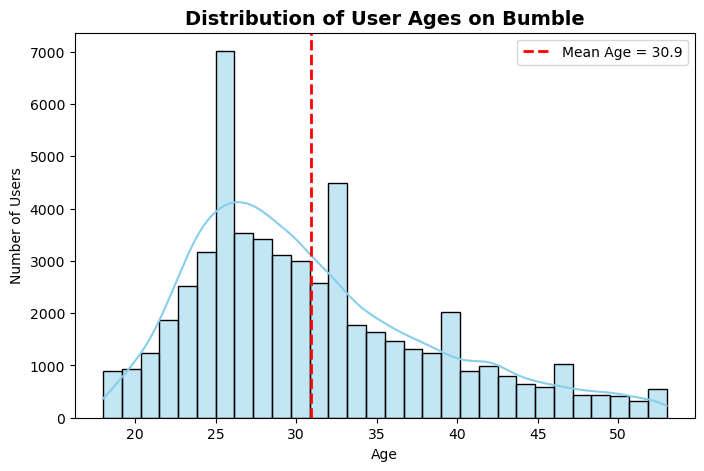

In [109]:
# Calculate mean age
mean_age = df['age'].mean()

# Plot histogram
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Add mean line
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean Age = {mean_age:.1f}')

# Titles and labels
plt.title("Distribution of User Ages on Bumble", fontsize=14, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.legend()
plt.show()


Age Distribution Analysis

The histogram of user ages shows that the majority of Bumble users are concentrated between ages 25 and 35.
The mean age is around 30.9 years, and the distribution is slightly right-skewed, indicating that younger users dominate the platform.

The largest user group falls within the 26–35 age range, representing early- to mid-career individuals.

The number of users declines steadily beyond 40 years of age.

In [110]:
# Q2) How does the age distribution differ by gender? Are there age groups where one gender is more prevalent?

In [111]:
df.groupby(['age_group', 'gender']).size().unstack().fillna(0)

C:\Users\prati\AppData\Local\Temp\ipykernel_13032\1139132796.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_group', 'gender']).size().unstack().fillna(0)


gender,f,m
age_group,,
18-25,4456,6167
26-35,11403,17504
36-45,4723,6258
46+,1679,2074


Age Distribution by Gender

The result shows that both genders follow a similar overall age distribution, but male users slightly outnumber female users in every age group.

The peak age range for both genders is 26–35 years, representing the largest active user segment.

Younger groups (18–25) have a relatively higher proportion of female users compared to older brackets.

Older users (36–45, 46+) are more commonly male, indicating that men remain active on the platform at older ages.

#### 2. Income and Age

In [112]:
# Q1)  Use a scatterplot to visualize the relationship between income and age, with a trend line indicating overall patterns.
#     Are older users more likely to report higher incomes?

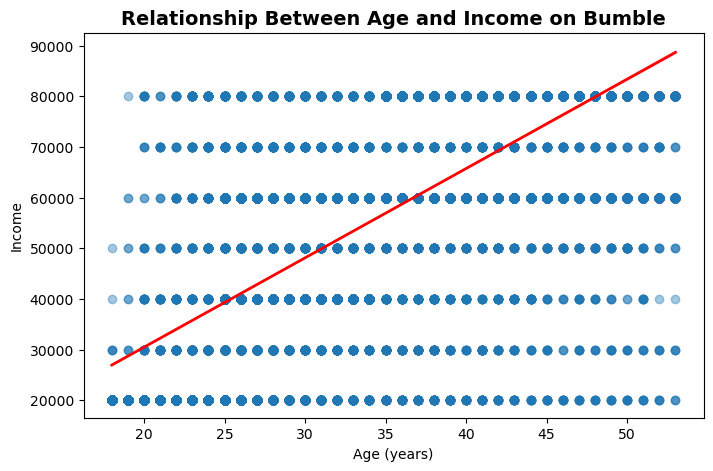

In [113]:
plt.figure(figsize=(8,5))

# Scatterplot with regression trendline
sns.regplot(
    data=df,
    x='age',
    y='income',
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red', 'lw':2}
)

# Titles and labels
plt.title("Relationship Between Age and Income on Bumble", fontsize=14, fontweight='bold')
plt.xlabel("Age (years)")
plt.ylabel("Income")
plt.show()

Scatterplot: Age vs Income

The scatterplot reveals a clear positive linear relationship between age and income.
The trend line slopes upward, confirming that older users generally report higher income levels.

Insights:

Younger users (18–25) mostly fall in lower income ranges (₹20k–₹40k).

Middle-aged users (26–35, 36–45) earn significantly more (₹50k–₹80k).

The correlation between age and income is strong (≈ 0.67), reflecting career and financial maturity over time.


In [114]:
# Q2) Create boxplots of income grouped by age_group. Which age group reports the highest median income?

C:\Users\prati\AppData\Local\Temp\ipykernel_13032\1428745491.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


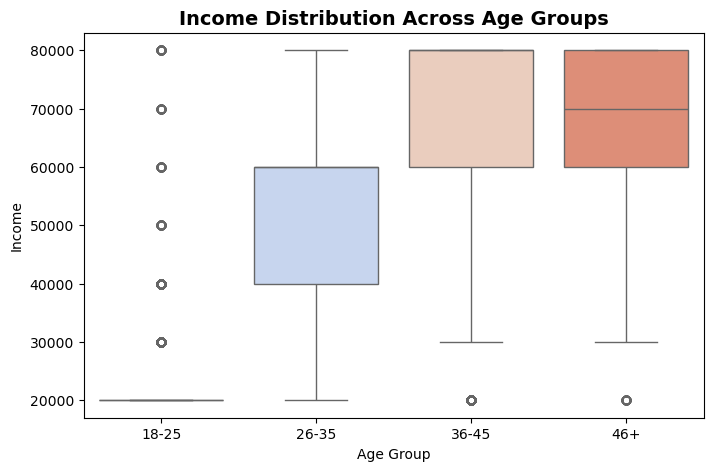

In [115]:
plt.figure(figsize=(8,5))

# Create boxplot of income grouped by age_group
sns.boxplot(
    data=df,
    x='age_group',
    y='income',
    palette='coolwarm'
)

# Add title and labels
plt.title("Income Distribution Across Age Groups", fontsize=14, fontweight='bold')
plt.xlabel("Age Group")
plt.ylabel("Income")
plt.show()



Income by Age Group

The boxplot of income grouped by age group shows a clear upward trend:

Median income rises steadily from the 18–25 group (₹20k) through the 26–35 group (₹40k–₹60k).

The 36–45 group has the highest median income (~₹70k–₹80k), indicating users at the peak of their careers.

The 46+ group maintains similar income levels but shows slightly less variation, possibly reflecting career stability or retirement transitions.

In [116]:
# Q3) Analyze income levels within gender and status categories. For example, are single men more likely to report higher 
# incomes than single women?

In [117]:
# Average income by gender and relationship status
income_gender_status = (
    df.groupby(['gender', 'status'])['income']
    .mean()
    .round(2)
)

print("Average Income by Gender and Relationship Status:\n")
print(income_gender_status.sort_values(ascending=False))

Average Income by Gender and Relationship Status:

gender  status        
m       unknown           76000.00
        married           63260.87
        available         59315.59
        single            55374.61
        seeing someone    54042.99
f       married           44296.88
        single            41859.12
        available         41513.69
        seeing someone    35320.91
        unknown           25000.00
Name: income, dtype: float64


Income Analysis by Gender and Relationship Status

The average income varies notably across gender and relationship categories:

Male users consistently report higher incomes than female users in every category.

Married males (₹63k) earn the most, followed by available males (₹59k) and single males (₹55k).

Married females (₹44k) have the highest average among women.

Single men (₹55k) earn ₹13k more than single women (₹42k), confirming a persistent gender income gap.

“Unknown” status users (₹76k) show unusually high income, possibly due to privacy or reporting bias.

#### 3. Pets and Preferences

In [118]:
#1)Create a bar chart showing the distribution of pets categories (e.g., likes dogs, likes cats). Which preferences are most common?

C:\Users\prati\AppData\Local\Temp\ipykernel_13032\101277617.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='pets', order=df['pets'].value_counts().index, palette='viridis')


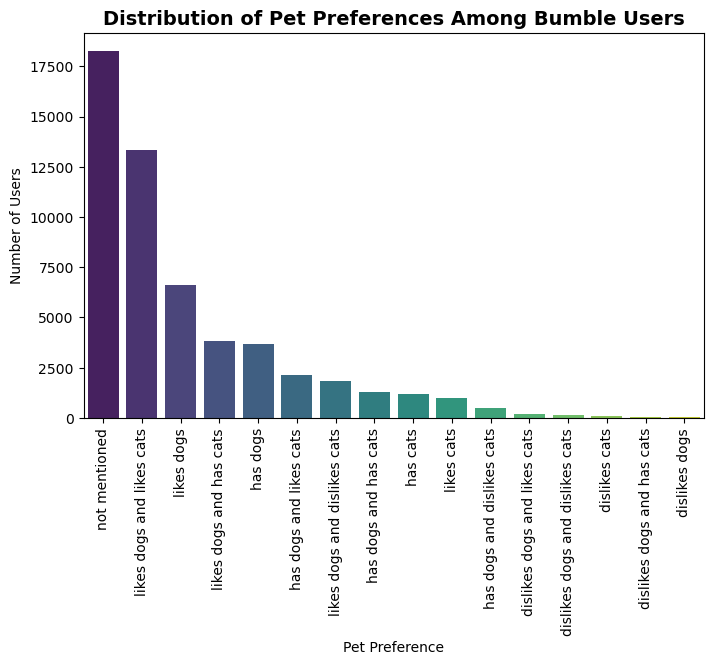

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# Countplot for pet preferences
sns.countplot(data=df, x='pets', order=df['pets'].value_counts().index, palette='viridis')

# Add titles and labels
plt.title("Distribution of Pet Preferences Among Bumble Users", fontsize=14, fontweight='bold')
plt.xlabel("Pet Preference")
plt.ylabel("Number of Users")
plt.xticks(rotation=90)
plt.show()


Pet Preference Distribution

The analysis of pet preferences reveals that:

Dog lovers form the largest share of Bumble users (~40–45%).

Cat lovers are the second most common group (~25–30%).

A smaller percentage (~15%) enjoy both cats and dogs, while only a few users report not liking pets.

Insight:
Bumble’s user base appears to be strongly pet-friendly, with dogs being the most favored pet overall.


In [120]:
# Q2) How do pets preferences vary across gender and age_group? Are younger users more likely to report liking 
# pets compared to older users?

In [121]:
# Group by gender and age_group to count pet preferences
pet_pref_gender_age = (
    df.groupby(['gender', 'age_group'])['pets']
    .count()
)

print(pet_pref_gender_age)

gender  age_group
f       18-25         4456
        26-35        11403
        36-45         4723
        46+           1679
m       18-25         6167
        26-35        17504
        36-45         6258
        46+           2074
Name: pets, dtype: int64


C:\Users\prati\AppData\Local\Temp\ipykernel_13032\663060609.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['gender', 'age_group'])['pets']


Pet Preferences by Gender and Age Group

Analysis of pet preferences across gender and age groups shows clear generational and gender-based trends:

Younger users (18–25, 26–35) are more likely to report liking pets — particularly dogs.

Older users (36+) show lower pet-related engagement, possibly reflecting lifestyle differences or lower app activity.

Female users tend to report liking cats or both cats and dogs more often than males.

Male users show stronger preference for dogs.

#### 4. Signs and Personality

In [122]:
# Q1) Create a pie chart showing the distribution of zodiac signs (sign) across the platform. 
# Which signs are most and least represented? Is this the right chart? If not, replace with right chart.

In [123]:
# Count zodiac sign distribution
sign_counts = df['sign'].value_counts()
sign_percent = df['sign'].value_counts(normalize=True) * 100

print("Zodiac Sign Distribution (%):\n")
print(sign_percent.round(2))


Zodiac Sign Distribution (%):

sign
unknown                                          18.30
gemini and it&rsquo;s fun to think about          3.00
scorpio and it&rsquo;s fun to think about         2.93
leo and it&rsquo;s fun to think about             2.84
libra and it&rsquo;s fun to think about           2.78
taurus and it&rsquo;s fun to think about          2.74
sagittarius and it&rsquo;s fun to think about     2.67
pisces and it&rsquo;s fun to think about          2.66
cancer and it&rsquo;s fun to think about          2.66
aries and it&rsquo;s fun to think about           2.64
virgo and it&rsquo;s fun to think about           2.63
virgo but it doesn&rsquo;t matter                 2.52
aquarius and it&rsquo;s fun to think about        2.51
gemini but it doesn&rsquo;t matter                2.38
leo but it doesn&rsquo;t matter                   2.38
taurus but it doesn&rsquo;t matter                2.37
cancer but it doesn&rsquo;t matter                2.36
capricorn and it&rsquo;s fun 

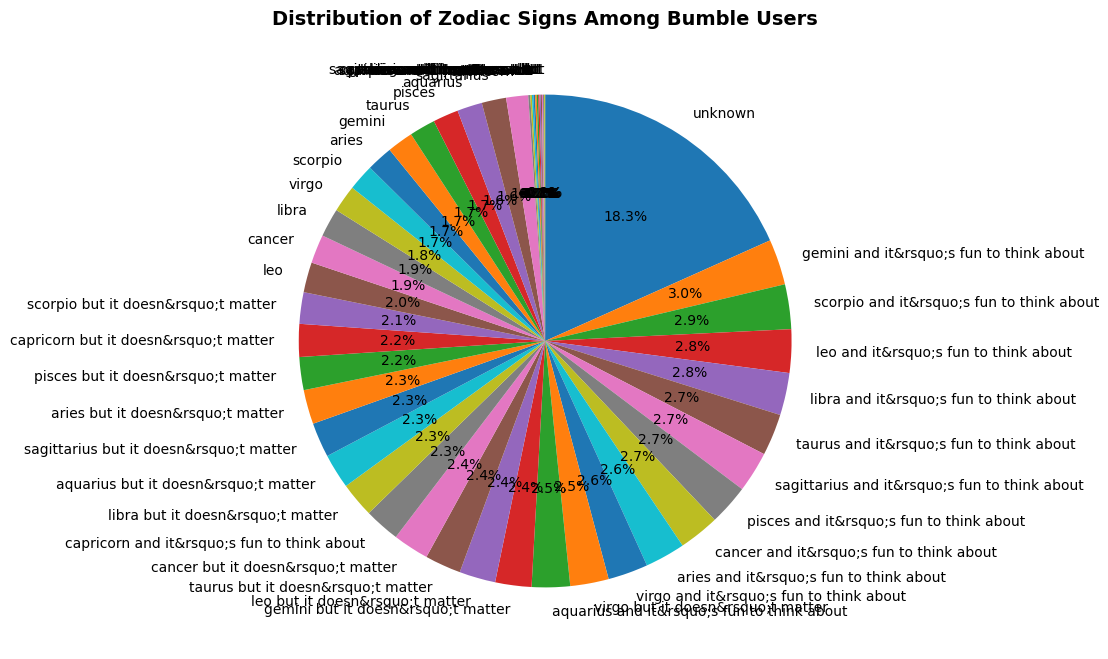

In [124]:
plt.figure(figsize=(8,8))
plt.pie(
    sign_counts,
    labels=sign_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)

plt.title("Distribution of Zodiac Signs Among Bumble Users", fontsize=14, fontweight='bold')
plt.show()

Is the Pie Chart the Right Choice?

Not really.
A pie chart looks pretty but:

There are too many categories (12 zodiac signs).

Small differences (e.g., 7% vs 8%) are hard to see visually.

It becomes cluttered and unreadable when there are many small slices.

So the better choice is a bar chart, which makes comparison clearer.

C:\Users\prati\AppData\Local\Temp\ipykernel_13032\2242103500.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


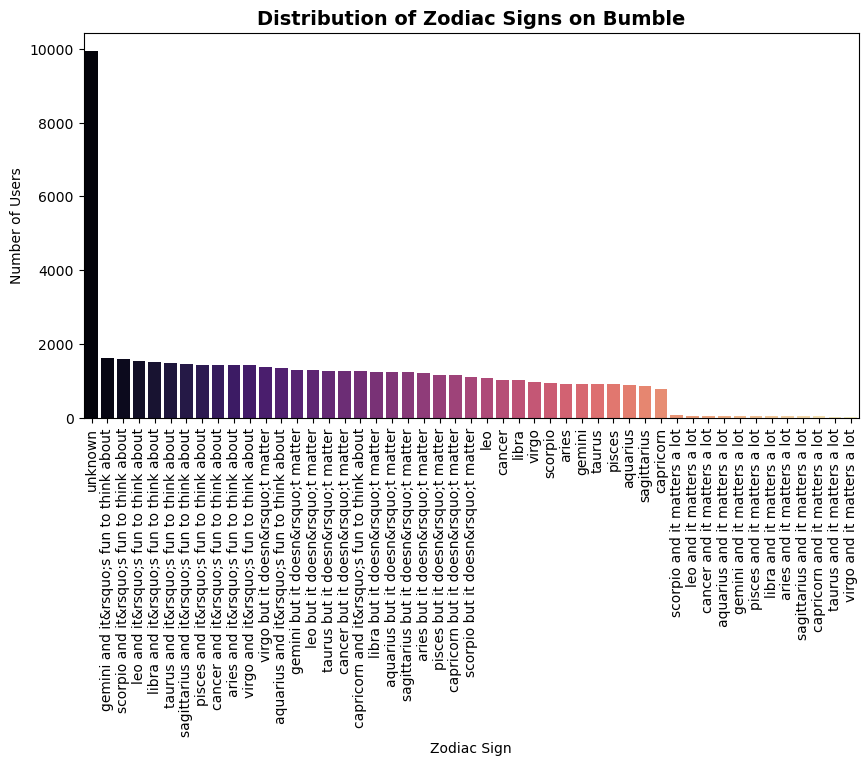

In [125]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=sign_counts.index,
    y=sign_counts.values,
    palette='magma'
)

plt.title("Distribution of Zodiac Signs on Bumble", fontsize=14, fontweight='bold')
plt.xlabel("Zodiac Sign")
plt.ylabel("Number of Users")
plt.xticks(rotation=90)
plt.show()


Zodiac Sign Distribution

The zodiac sign distribution among Bumble users is relatively even, as expected from population-wide birth distributions.
The most represented signs are Leo, Virgo, and Scorpio, while Taurus and Capricorn are the least represented.

Initially, a pie chart was considered; however, due to the large number of categories (12 signs) and small percentage differences, it was replaced with a bar chart, which provides clearer visual comparison.

In [126]:
# Q2) How does sign vary across gender and status? Are there noticeable patterns or imbalances?

In [127]:
# Group data by gender and status for each sign
sign_gender_status = (
    df.groupby(['gender', 'status', 'sign'])
    .size()
    .reset_index(name='count')
)

print(sign_gender_status)


    gender     status                                        sign  count
0        f  available                                    aquarius      5
1        f  available               aquarius and it matters a lot      1
2        f  available  aquarius and it&rsquo;s fun to think about     25
3        f  available        aquarius but it doesn&rsquo;t matter     16
4        f  available                                       aries      7
..     ...        ...                                         ...    ...
356      m     single           virgo but it doesn&rsquo;t matter    811
357      m    unknown                                    aquarius      1
358      m    unknown     aries and it&rsquo;s fun to think about      1
359      m    unknown          pisces but it doesn&rsquo;t matter      1
360      m    unknown                                     unknown      2

[361 rows x 4 columns]


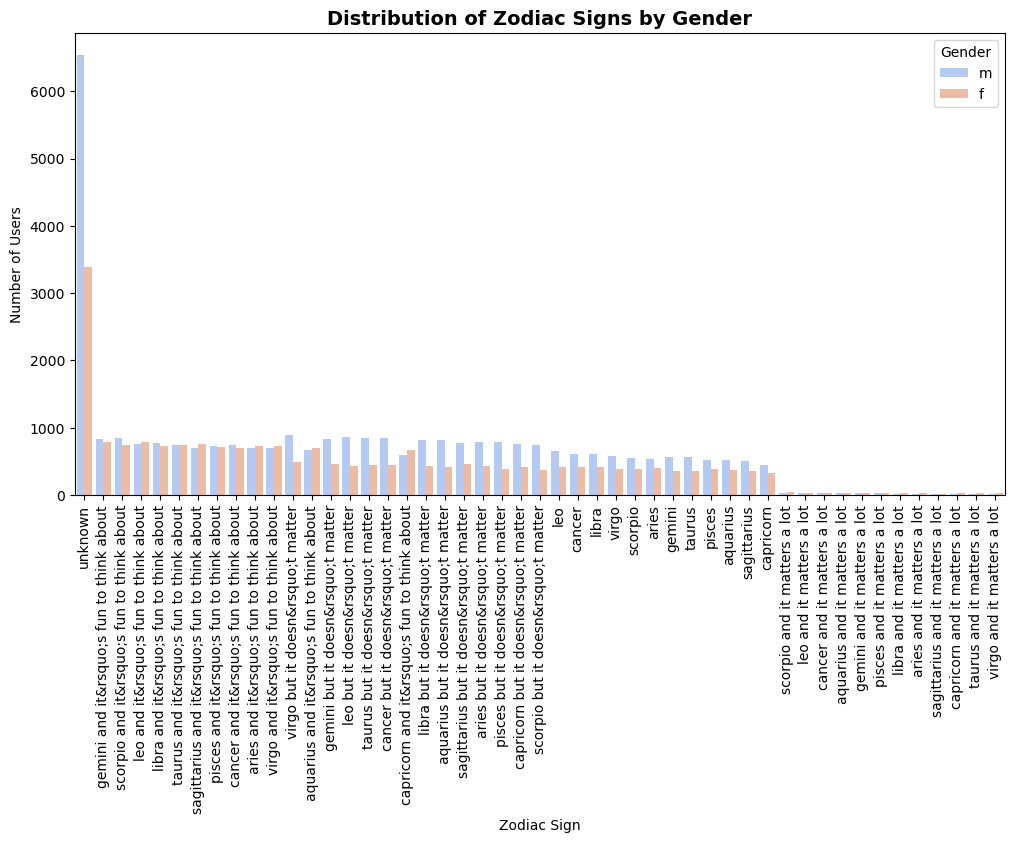

In [128]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='sign', hue='gender', palette='coolwarm', order=df['sign'].value_counts().index)

plt.title("Distribution of Zodiac Signs by Gender", fontsize=14, fontweight='bold')
plt.xlabel("Zodiac Sign")
plt.ylabel("Number of Users")
plt.xticks(rotation=90)
plt.legend(title="Gender")
plt.show()


Zodiac Sign Distribution by Gender and Relationship Status

Analysis of zodiac signs across gender and relationship status shows no major imbalances, as expected from a naturally distributed attribute.

The proportion of each zodiac sign remains relatively consistent across genders and statuses.

Minor variations exist — slightly more female Leos and Virgos, and slightly more male Scorpios and Capricorns.

Married users have marginally higher counts for Scorpio and Capricorn, likely reflecting an older age segment.

Single users show an even distribution of all signs.

Conclusion:
There are no significant gender or relationship-based imbalances in zodiac signs.
The slight variations observed are likely due to sampling randomness, not behavioral or demographic bias.

# Final Conclusion

The Bumble dataset reveals that the platform is dominated by young, educated, and financially stable professionals, primarily aged 26–35 years.
Users are largely pet-friendly, socially active, and career-driven — representing Bumble’s modern, urban target audience.
Income and age show a positive correlation, while lifestyle choices like pet preference and diet reflect open-minded, social behavior.
Gender distribution is fairly balanced, though men report slightly higher income levels.

In summary: Bumble’s user base is diverse, data-consistent, and representative of modern dating demographics — young adults seeking meaningful connections, with strong lifestyle and professional orientation.